In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
%matplotlib inline

url1 = 'https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/'
url2 = 'uber-trip-data/uber-raw-data-aug14.csv'
url = url1 + url2
df_uber = pd.read_csv(url)
#print('\n', df_uber)

df_uber.head()


,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [3]:
df_uber.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
Date/Time    829275 non-null object
Lat          829275 non-null float64
Lon          829275 non-null float64
Base         829275 non-null object
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


In [5]:
df_uber['Date/Time'] = pd.to_datetime(df_uber['Date/Time'], format="%m/%d/%Y %H:%M:%S")
df_uber['DayOfWeekNum'] = df_uber['Date/Time'].dt.dayofweek
df_uber['DayOfWeek'] = df_uber['Date/Time'].dt.weekday_name
df_uber['MonthDayNum'] = df_uber['Date/Time'].dt.day
df_uber['HourOfDay'] = df_uber['Date/Time'].dt.hour


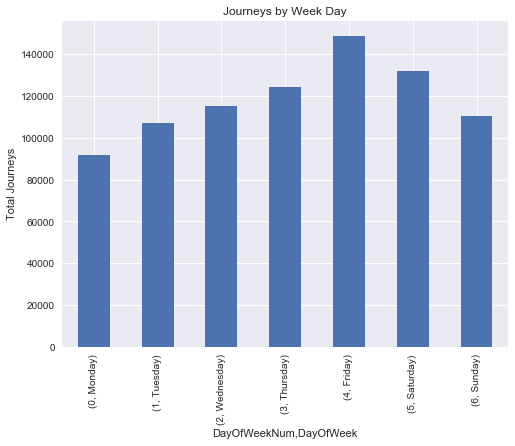

In [6]:
uber_weekdays = df_uber.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day');

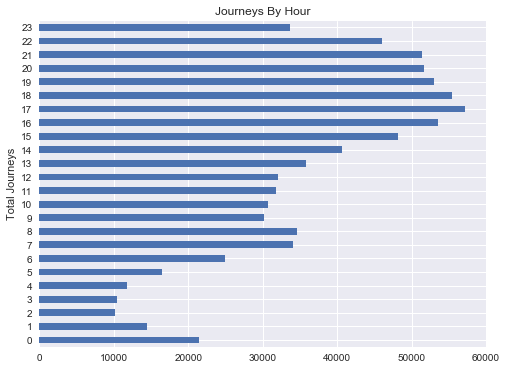

In [8]:
uber_hour=df_uber.pivot_table(index=['HourOfDay'], values = 'Base', aggfunc= 'count')
uber_hour.plot(kind='barh', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys By Hour')

/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3459: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3472: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


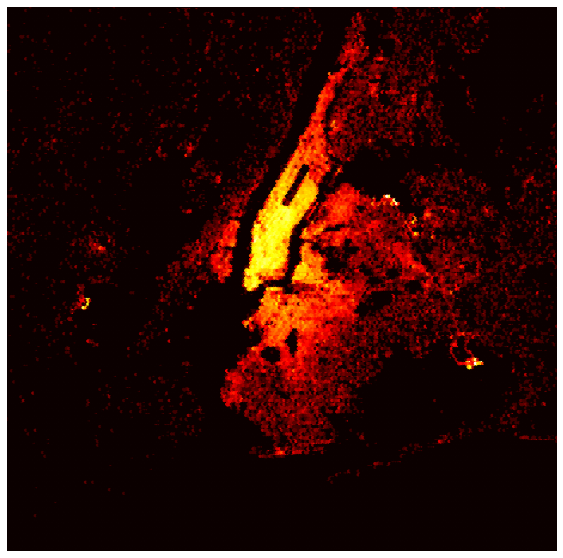

In [23]:
from mpl_toolkits.basemap import Basemap
west, south, east, north = -74.26, 40.50, -73.70, 40.92
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(df_uber['Lon'].values, df_uber['Lat'].values)
m.hexbin(x, y, gridsize=1000,
         bins='log', cmap=cm.hot);